In [1]:
# Name: Deepak Gupta
# Roll number : 167507
# Program : K-Mean with on Digit dataset with K = 10

In [2]:
import numpy as  np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [3]:
input_dataset=load_digits()
x=input_dataset.data[:150]
y=input_dataset.target
print(x.shape[0],x.shape[1])
k=10


150 64


In [4]:
no_rows=x.shape[0]
no_col=x.shape[1]
print(no_rows, no_col)
mean=[[0 for i in range(no_col)]for j in range(k)]
interval=int(no_rows/k)
print(interval)
init=0
for i in range(k):
    mean[i]=x[init]
    init=init+interval


150 64
15


In [5]:
def find_error(cluster_group, cluster_count):
    error = 0
    for i in range(k):
        for j in range(cluster_count[i]):
            if y[cluster_group[i][j]] != i:
                error = error + 1
    return error

Number of sample input is : 150
Number of items in cluster after each iteration: 
[18, 0, 1, 0, 0, 3, 7, 6, 67, 48]
[23, 0, 1, 0, 0, 0, 0, 0, 17, 109]
[25, 0, 3, 0, 0, 0, 2, 0, 2, 118]
[16, 0, 10, 0, 0, 0, 6, 0, 6, 112]
[8, 0, 13, 0, 0, 0, 9, 2, 3, 115]
[8, 0, 0, 0, 0, 0, 9, 6, 0, 127]
[9, 0, 0, 0, 0, 0, 9, 2, 0, 130]
[6, 0, 0, 0, 0, 0, 12, 2, 0, 130]
[9, 0, 0, 0, 0, 1, 13, 0, 0, 127]
[6, 0, 0, 1, 0, 2, 10, 2, 2, 127]
[4, 0, 0, 3, 0, 2, 1, 0, 6, 134]
[4, 0, 0, 1, 0, 2, 0, 1, 2, 140]
[4, 0, 0, 0, 0, 2, 0, 2, 1, 141]
[4, 0, 0, 0, 0, 2, 0, 2, 1, 141]


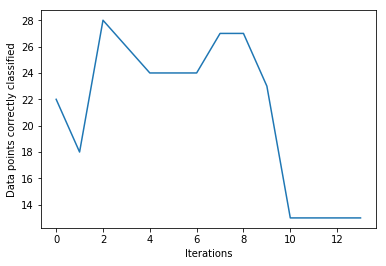

Accuracy with stablized mean for K = 10 is 8 %


In [6]:
print("Number of sample input is : %d" % no_rows)
print("Number of items in cluster after each iteration: ")
num_iter = 0
error1 = []

cluster_group_prev=[[0 for i in range(no_rows)]for j in range(k)]

while(1):

    cluster=[0 for i in range(no_rows)]
    cluster_group=[[0 for i in range(no_rows)]for j in range(k)]
    cluster_count=[0 for i in range(k)]
    for i in range(no_rows):
        minimum=np.sum(np.subtract(x[i],mean[0])**2)
        for j in range(k):
            diff=np.sum(np.subtract(x[i],mean[j])**2)
            if(diff<minimum):
                cluster[i]=j
        cluster_number=cluster[i]
        cluster_group[cluster_number][cluster_count[cluster_number]]=i
        cluster_count[cluster_number]=cluster_count[cluster_number]+1
    flag = True
    
    #Updating with new cluster
    for i in range(k):
        res=[0 for j in range(no_col)]
        for j in range(cluster_count[i]):
            res=np.add(res,x[cluster_group[i][j]])
            mean[i]=res/cluster_count[i]
    print(cluster_count)
    error = find_error(cluster_group, cluster_count)
    error1.append( no_rows - error)
    num_iter = num_iter +1
    if cluster_group_prev == cluster_group:
        break
    cluster_group_prev = cluster_group
    
# clustering group

    

plt.plot(error1)
plt.xlabel("Iterations")
plt.ylabel("Data points correctly classified")
plt.show()

accuracy = (error1[len(error1)-1]/no_rows)*100
print("Accuracy with stablized mean for K = 10 is %d %%" % accuracy)